<a href="https://colab.research.google.com/github/moizarsalan/Digital-Image-Processing-Labs/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abdul Moiz Arsalan**

### **B22F1086AI072**

### Lab Instructor: Sir Rizwan Shah

### Course Instructor: Dr Abdul Jalil

## **Lab 09**

### **Implementnig Low-Pass Filtering:**

Low-pass filtering makes an image smoother by removing sharp details while keeping soft areas. First, the image is converted into the frequency domain using the Discrete Fourier Transform (DFT). Three filters are used: Ideal (ILPF), Butterworth (BLPF), and Gaussian (GLPF). ILPF removes high frequencies completely, which can cause unwanted ringing effects. BLPF gives a smoother result with fewer artifacts. GLPF is the best for natural smoothing while keeping important details. After filtering, the image is changed back using the inverse DFT. This method helps in reducing noise and making images less sharp.

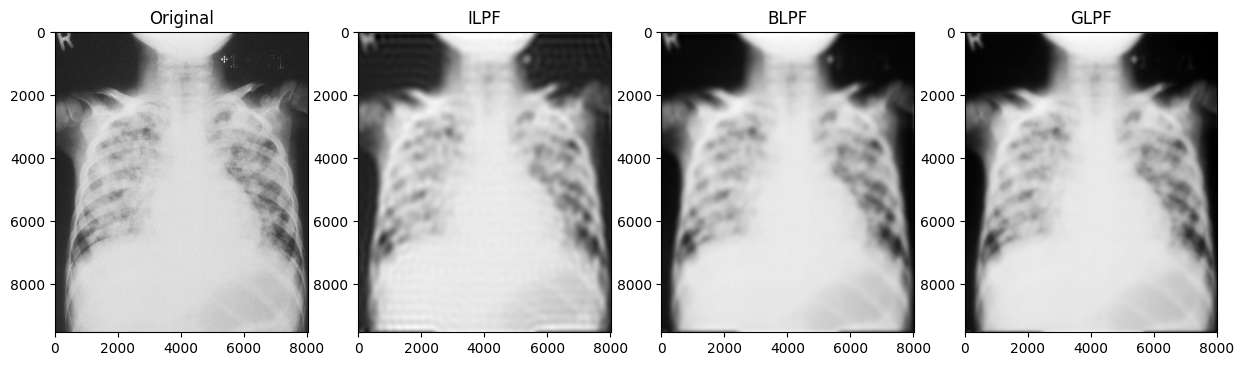

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/cdc-SrHKQxGuuqQ-unsplash.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow, ccol = rows//2, cols//2

def ilpf(radius):
    mask = np.zeros((rows, cols, 2), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, (1,1), -1)
    return mask

def blpf(d0, n=2):
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i-crow)**2 + (j-ccol)**2)
            mask[i, j] = 1 / (1 + (d/d0)**(2*n))
    return mask

def glpf(d0):
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i-crow)**2 + (j-ccol)**2)
            mask[i, j] = np.exp(-(d**2) / (2*(d0**2)))
    return mask

filters = {'ILPF': ilpf(30), 'BLPF': blpf(30), 'GLPF': glpf(30)}
fig, axes = plt.subplots(1, 4, figsize=(15,5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')

for i, (name, mask) in enumerate(filters.items(), 1):
    filtered = dft_shift * mask
    f_ishift = np.fft.ifftshift(filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    axes[i].imshow(img_back, cmap='gray')
    axes[i].set_title(name)

plt.show()


### **Implementing High-Pass Filtering:**

High-pass filtering makes edges and fine details in an image clearer by removing smooth areas. The image is first changed into the frequency domain using the Discrete Fourier Transform (DFT). Three high-pass filters are used: Ideal (IHPF), Butterworth (BHPF), and Gaussian (GHPF). IHPF removes low frequencies completely, which can cause sharp but unnatural results. BHPF gives a smoother effect while still enhancing edges. GHPF provides the most natural sharpening with fewer unwanted effects. After filtering, the inverse DFT brings the image back. This method is useful for edge detection and sharpening images.

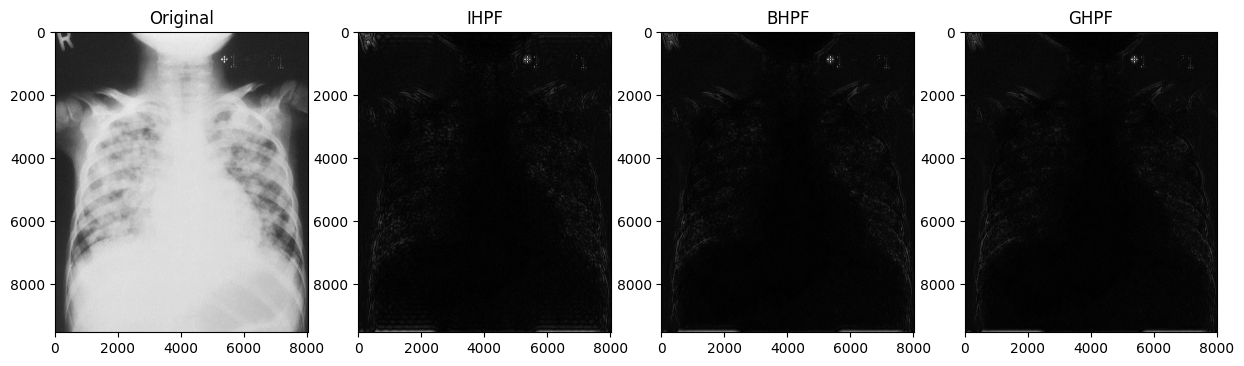

In [2]:
def ihpf(radius):
    mask = np.ones((rows, cols, 2), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, (0,0), -1)
    return mask

def bhpf(d0, n=2):
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i-crow)**2 + (j-ccol)**2)
            mask[i, j] = 1 - (1 / (1 + (d/d0)**(2*n)))
    return mask

def ghpf(d0):
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i-crow)**2 + (j-ccol)**2)
            mask[i, j] = 1 - np.exp(-(d**2) / (2*(d0**2)))
    return mask

filters = {'IHPF': ihpf(30), 'BHPF': bhpf(30), 'GHPF': ghpf(30)}
fig, axes = plt.subplots(1, 4, figsize=(15,5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')

for i, (name, mask) in enumerate(filters.items(), 1):
    filtered = dft_shift * mask
    f_ishift = np.fft.ifftshift(filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    axes[i].imshow(img_back, cmap='gray')
    axes[i].set_title(name)

plt.show()


### **Energy Retention Calculation:**

Energy retention measures how much of the image’s original energy remains after filtering. It is calculated by summing the squared pixel values before and after applying high-pass filters. Since high-pass filters remove low frequencies, most of the image's energy is lost. The results show very low energy retention: IHPF (0.25%), BHPF (0.22%), and GHPF (0.20%).

Low energy retention happens because most image energy is in smooth regions, which high-pass filters remove. This makes the image lose overall brightness and soft details, leaving only edges and fine structures. The effect enhances sharp details but can also increase noise and make the image look unnatural.

In [3]:
# Task 3: Energy Retention Calculation

def energy(img):
    return np.sum(img**2)

orig_energy = energy(dft_shift)
energies = {name: energy(dft_shift * mask) for name, mask in filters.items()}
retention = {name: (e / orig_energy) * 100 for name, e in energies.items()}

for name, r in retention.items():
    print(f'{name}: {r:.2f}% energy retained')


IHPF: 0.25% energy retained
BHPF: 0.22% energy retained
GHPF: 0.20% energy retained
